In [505]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_dist_warp,target_y_dist_warp,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y
0,1,13,img_1,544.5,992.5,546.5,978.5,400.31912,562.67110,402.40564,...,1067.9042,535.9816,1068.4825,534.40424,-45.318967,-38.762780,-45.724640,-39.169025,1217.5,1133.5
1,2,13,img_2,766.5,1279.0,771.0,1264.0,628.63520,853.44150,632.79670,...,1067.9042,535.9816,1068.4825,534.40424,-80.865582,-81.086481,-81.381218,-81.591148,1398.0,1265.0
2,3,13,img_3,1098.0,1389.0,1101.5,1373.5,965.78076,963.85480,968.40430,...,1067.9042,535.9816,1068.4825,534.40424,-112.082651,-112.289897,-112.468086,-112.674858,1409.0,1273.0
3,4,13,img_4,1514.0,1196.5,1514.0,1184.5,1384.80680,766.92880,1383.43700,...,1067.9042,535.9816,1068.4825,534.40424,-151.987874,-152.006009,-152.130371,-152.173370,855.5,691.5
4,5,13,img_5,1514.5,398.5,1511.5,394.0,1378.65440,-43.00896,1374.41130,...,1067.9042,535.9816,1068.4825,534.40424,-47.809649,-47.588874,-48.229115,-48.007038,1266.0,1149.0


In [514]:
x = df[['target_x_undist', 'target_y_undist', 'angle_undist','aruco_flipper_76_x'	,'aruco_flipper_76_y']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [527]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Linear regressor

In [528]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [529]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

122946.59633873282 0.8966795771751443


Text(0.5, 1.0, 'actual vs predicted')

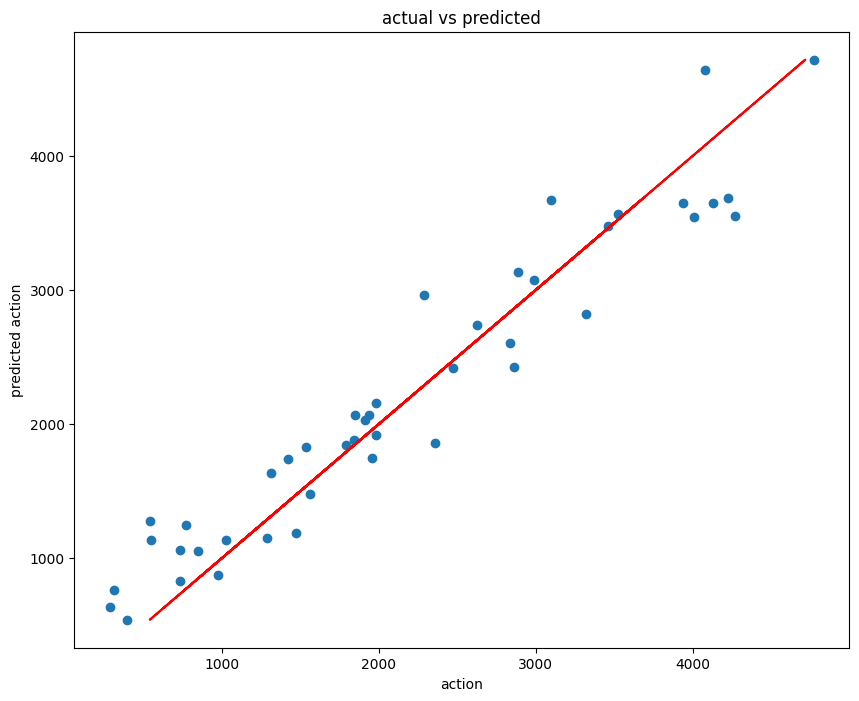

In [530]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# polynomic regressor

In [531]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

In [532]:
model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [533]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

324.08867986470614 0.9073790340472513


Text(0.5, 1.0, 'actual vs predicted')

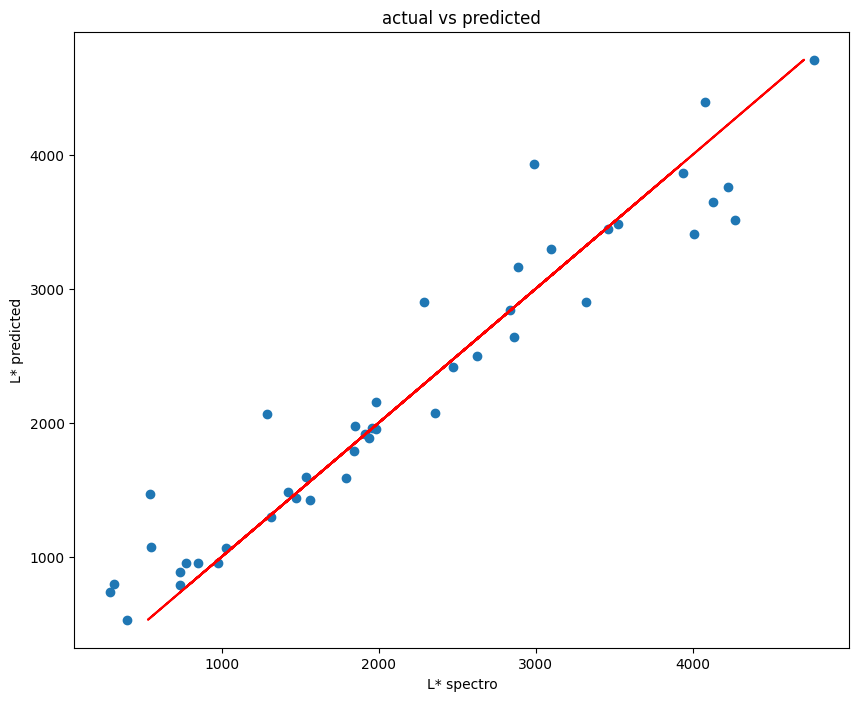

In [534]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# DecisionTreeRegressor

In [466]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [467]:
y_pred=model.predict(x_test)

In [468]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

451041.615767619 0.5350421584519243


Text(0.5, 1.0, 'actual vs predicted')

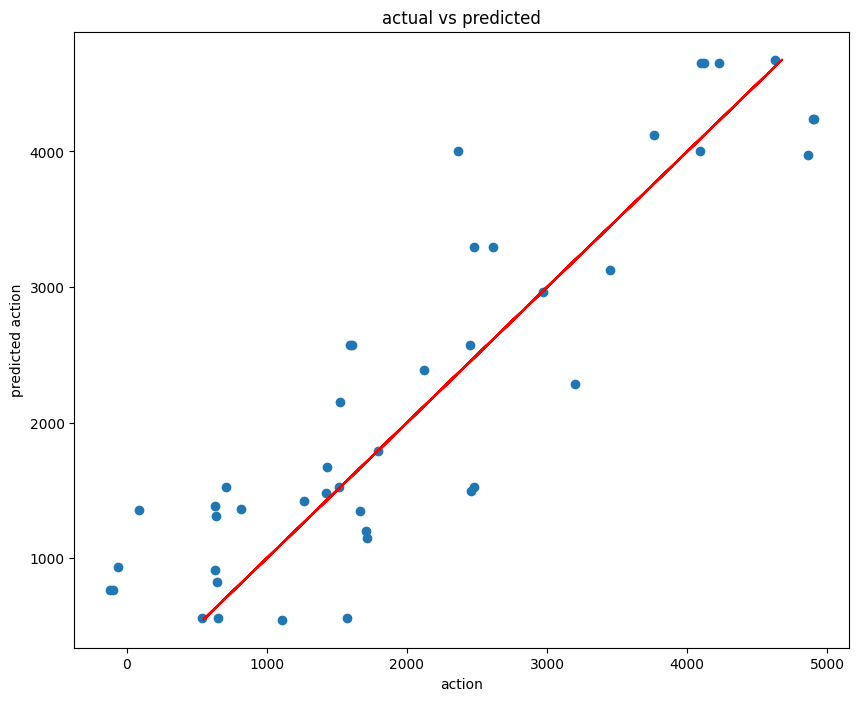

In [469]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# Gradient Boosting Regressor

In [470]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=400)
model.fit(x_train ,y_train.values.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [85, 170]

In [393]:
y_pred=model.predict(x_test)

In [394]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

142475.52404227323 0.933048252710905


Text(0.5, 1.0, 'actual vs predicted')

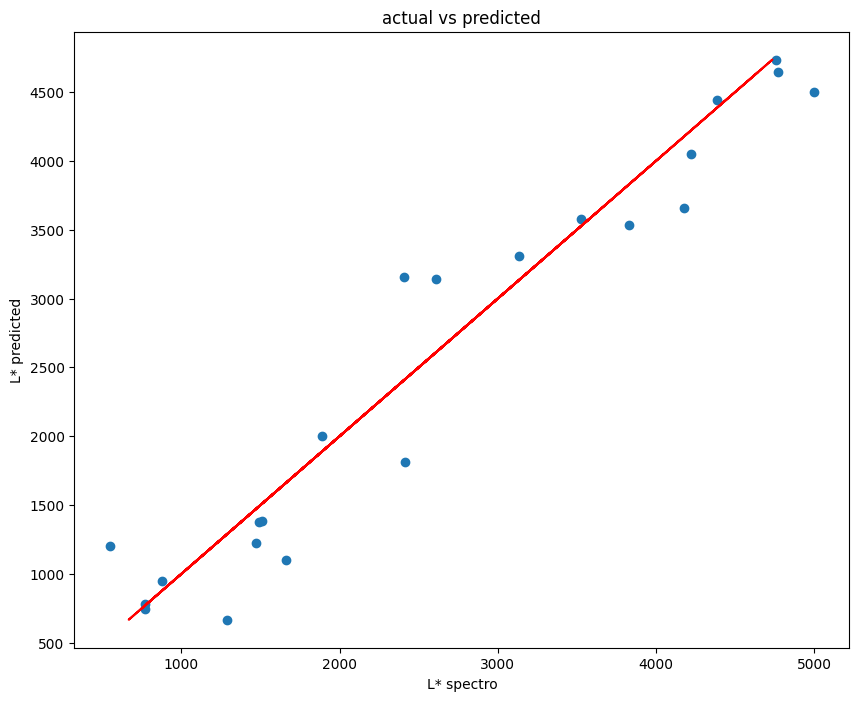

In [395]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# Random forest

In [396]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)
model.fit(x_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=300)

In [397]:
y_pred=model.predict(x_test)

In [398]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

142183.95085138892 0.9331852680665149


Text(0.5, 1.0, 'actual vs predicted')

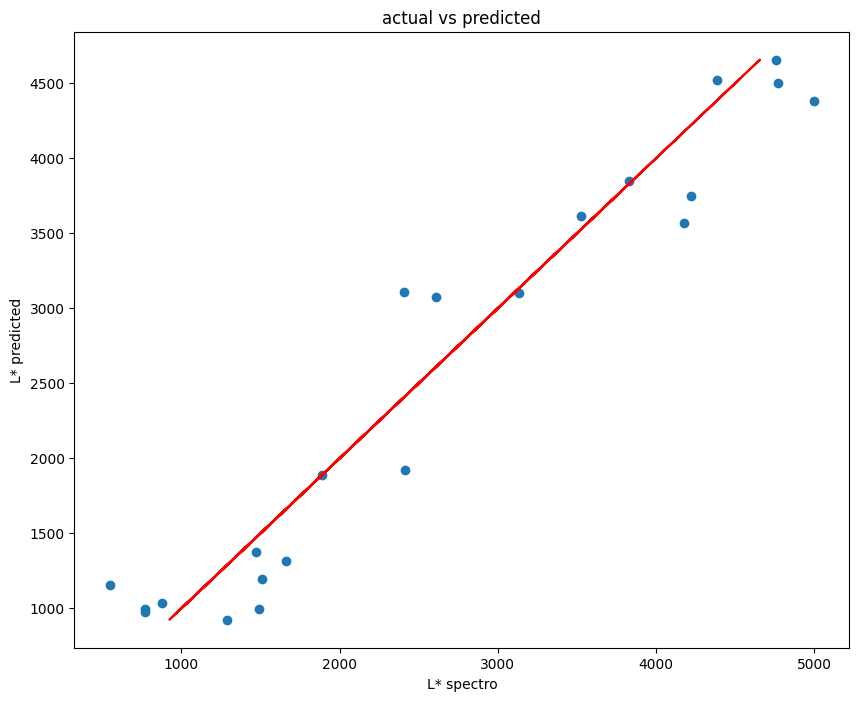

In [399]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# SVM

In [357]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train, y_train.values.ravel())

SVR()

In [358]:
y_pred=model.predict(x_test)

In [359]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

563379.1221670393 -0.252285112390084


Text(0.5, 1.0, 'actual vs predicted')

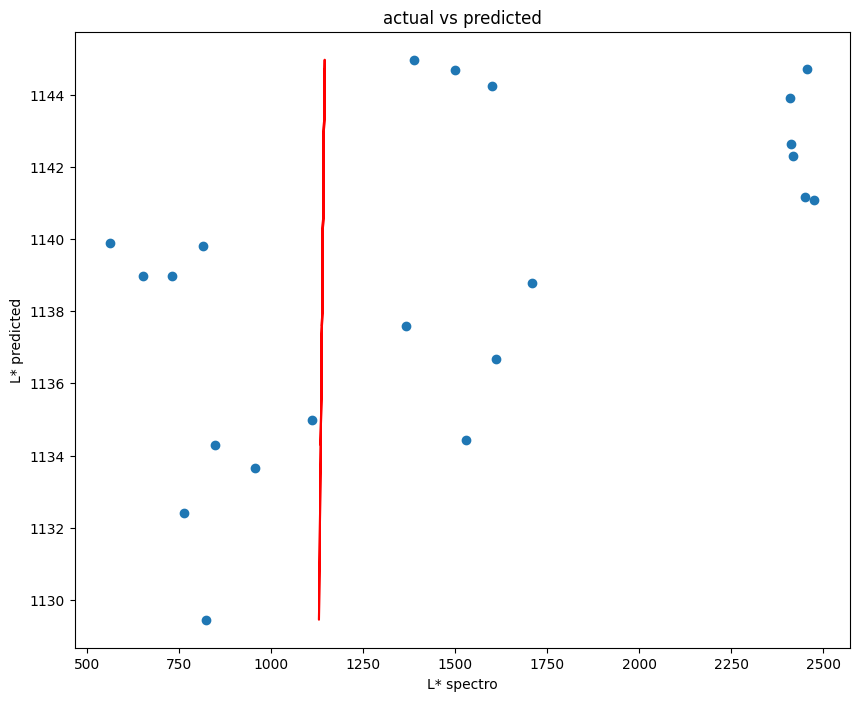

In [360]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# KRR

In [471]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1.0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [472]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

63014.225973445136 0.9379765753894577


Text(0.5, 1.0, 'actual vs predicted')

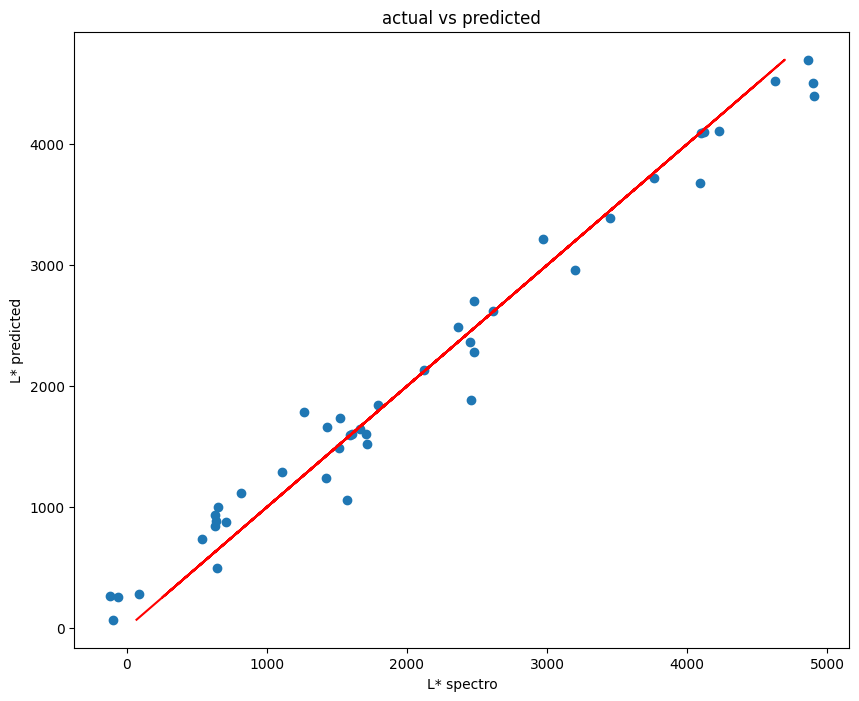

In [473]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

In [474]:
y_test

,carriage_x_undist_warp,carriage_y_undist_warp
26,3451.00980,-96.440750
105,4900.30600,2475.901000
104,4905.13300,1514.158000
37,4119.27930,1611.391500
18,3195.63400,86.216430
43,2972.88500,1110.136100
74,639.94183,2454.782500
36,4862.28200,1713.736300
67,632.08606,651.509640
101,4226.62160,2450.495800


In [475]:
y_pred

array([[3387.17913243,   71.10589612],
       [4500.13879362, 2278.81951417],
       [4399.10167811, 1488.44955605],
       [4098.93194048, 1606.69583166],
       [2962.59534701,  285.2553701 ],
       [3218.40651629, 1293.62456969],
       [ 886.28068498, 1886.33385065],
       [4695.54832265, 1526.04498281],
       [ 846.58269909,  999.60726123],
       [4103.34200518, 2362.15604835],
       [1783.12591382, 2134.63460292],
       [4523.62499539, 1841.21944253],
       [1736.84560612,  255.19586214],
       [4090.46879369, 1597.37761307],
       [1646.4630396 , 1661.64705202],
       [3678.16997971,  500.24356155],
       [2707.07573332, 1056.07871741],
       [1240.25883059, 1119.01740057],
       [2622.12519482,  741.46455752],
       [ 934.39508822,  268.37716201],
       [2491.29297108,  875.4612351 ],
       [3720.0400619 , 1602.51130762]])